In [121]:
## Importing important modules.
import pandas as pd
import os

In [25]:
gf = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

In [26]:
gf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [27]:
files1 = [file for file in os.listdir('./Sales_data')]

In [122]:
## Combining 12 different files into a single file -- all_data

all_months_data= pd.DataFrame()

for file in files1:
    gf = pd.read_csv('./Sales_Data/'+file)
    all_months_data= pd.concat([all_months_data,gf])

all_months_data.to_csv("all_data.csv" , index=False)

In [29]:
all_data= pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


CLEAN UP THE DATA!!!!


In [30]:
nan_df= all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


Dropping the Nan values!!!!


In [31]:
all_data= all_data.dropna(how='any')

In [32]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Which month had the maximum sales?

In [125]:
## Question 1 -  Which month had the maximum sales?
## For the same we added a month column.
## all_data['month']=all_data['Order Date'].str[0:2]
## We encountered the below error and proceeded accordingly to remove it.

ERROR = invalid literal for int() with base 10: 'Or'
### FINDING OR AND DELETING IT

In [35]:
all_data = all_data[ all_data['Order Date'].str[0:2] !='Or']
all_data['month']= all_data['month'].astype('int32')

KeyError: 'month'

In [36]:
 all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Adding other column to get the price


In [38]:
all_data['Sales']= all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

TypeError: can't multiply sequence by non-int of type 'str'

TypeError: can't multiply sequence by non-int of type 'str'

# to convert column to correct datatype

In [39]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) ## to int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])  ## to float
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [40]:
 ## now executing the statement to add column after removing errors
    
all_data['Sales']= all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()
    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [47]:
## now find the month having maximum sales
new =all_data.groupby('month').sum()

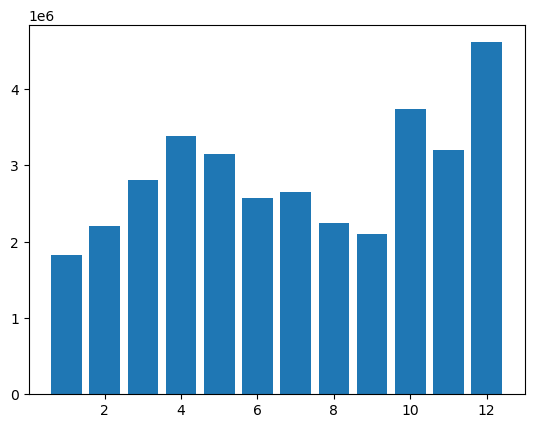

In [51]:
import matplotlib.pyplot as plt
Month=range(1,13)
plt.bar(Month,new['Sales'])

plt.show()

In [126]:
## - As per our analysis December had the maximum sales.

##  To find which state had the maximun sales
## Adding a state column for the same

In [59]:
## lets use apply method
 
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data['City']= all_data['Purchase Address'].apply(lambda x:get_city(x) + ' ' + get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA


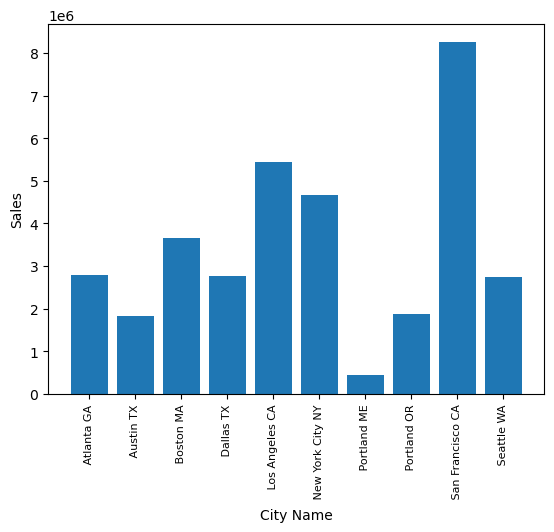

In [72]:
results = all_data.groupby('City').sum()

cities=[ city for city , df in all_data.groupby('City')]
plt.bar(cities,results['Sales'])
plt.xlabel('City Name')
plt.ylabel('Sales')
plt.xticks(cities, rotation='vertical', size=8)
plt.show()

In [127]:
## As per our anaysis San Francisci CA had the maximum sales.

## Question 3 - At what time should we display ad to maximize the likelihood of a customer buying product?


In [74]:
## converting it Order Date to a usefull format
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])

In [75]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA


In [77]:
all_data['Hour']= all_data['Order Date'].dt.hour
all_data['Minute']= all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,9,27


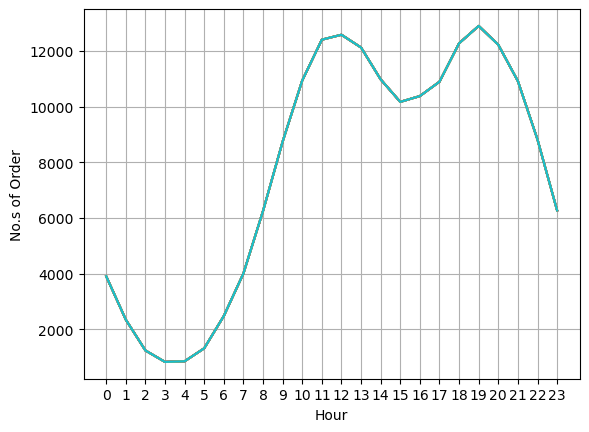

In [81]:
hours= [hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('No.s of Order')
plt.grid()

## My recommedation is around 11 am and 7 pm

## Question- What products are most often sold together??



In [95]:
df = all_data[all_data['Order ID'].duplicated(keep= False)]
df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

C:\Users\Poorva Mahto\AppData\Local\Temp\ipykernel_9672\1699837085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [98]:
## dropping duplicates
port 
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [101]:
## counting the Grouped items, importing new lib
from itertools import combinations
from collections import Counter

count= Counter()

for row in df['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,2 )))
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [128]:
## What product was sold most ? 

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,9,27


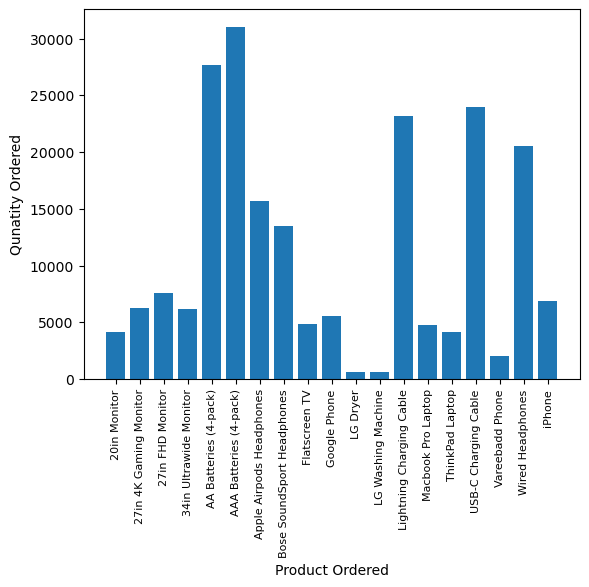

In [112]:
product_group = all_data.groupby('Product')
quantity_ordered=product_group['Quantity Ordered'].sum()

products= [product for product ,df in product_group ]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Product Ordered')
plt.ylabel('Qunatity Ordered')
plt.show()

In [129]:
## As per our analysis AAA Batteries we sold the most.